In [1]:
import nltk
import json
import os

C:\ProgramData\Anaconda3_new\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\ProgramData\Anaconda3_new\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\ProgramData\Anaconda3_new\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
os.getcwd()

'C:\\Users\\Sayantan\\Documents\\topical coherence\\server\\app'

In [15]:
books = ['SOMEWT', 'Life_of_Mahatma_Gandhi', 'Gandhi_Before_India', 'Jawaharlal_Nehru_Autobiography',
         'Jawaharlal_Nehru_a_Biography']

biography_words = ['hailey', 'league', 'motilal', 'dept', 'pol', 'imperialism', 'aicc', 'independence', 'organization',
'papers', 'secretary', 'british', 'soviet', 'communist', 'china', 'fight', 'kisans', 'chinese', 'emerson', 'support',
'willingdon', 'jail', 'settlement', 'union', 'brussels', 'capitalism']

autobiography_words = ['Gandhiji', 'Gaol', 'Organisation', 'people', 'physical', 'peasantry', 'prison', 'languages']

In [4]:
bio_topic_text = []

start_year = 1927
end_year = 1931
with open("static/json_files/%s/year_chapter_chaptername_dict.json"%books[4], 'r', encoding="utf-8") as content:
    year_chapter = json.load(content)

for year in year_chapter.keys():
    if int(year) >= start_year and int(year) <= end_year:
        for chapter_list in year_chapter[year]: 
            part = chapter_list[0]
            chap = chapter_list[1]
            with open("static/text_books/%s/part%s/chapter%s.txt"%(books[4], part, chap), 'r', encoding='utf-8') as f:
                sentences = f.read().split(".")
            
            for word in biography_words:
                for sent in sentences:
                    if word in sent: 
                        bio_topic_text.append(sent)
sent_tok=bio_topic_text
sent_tok

['4\nHowever, the real significance of these travels was that Jawaharlal now came into contact with European political workers and movements, and these gave a new depth to his thinking and activities',
 '’1 An over-enthusiastic district magistrate had suggested to Jawaharlal that he should facilitate the issue of a passport by giving an assurance that he was not visiting Europe for political purposes; but neither at Lucknow nor at Simla did Jawahar- lal’s refusal to give any such assurance cause any hesitation in permitting him to leave',
 ' But it was this spell in Europe, and not the earlier years at Harrow and Cambridge, that was to provide Jawaharlal with his real political education; and here again it was Gandhi who was the most perceptive',
 ' Indian politics at this time were in a low and grim condition',
 '-Indeed the whole future outlook is so gloomy that, from the political viewpoint, a return to India is far from agreeable',
 '’1 The news from India of communal rioting depre

In [16]:
autobio_topic_text = []

start_year = 1927
end_year = 1931
with open("static/json_files/%s/year_chapter_chaptername_dict.json"%books[3], 'r', encoding="utf-8") as content:
    year_chapter = json.load(content)

for year in year_chapter.keys():
    if int(year) >= start_year and int(year) <= end_year:
        for chapter_list in year_chapter[year]: 
            part = chapter_list[0]
            chap = chapter_list[1]
            with open("static/text_books/%s/part%s/chapter%s.txt"%(books[3], part, chap), 'r', encoding='utf-8') as f:
                sentences = f.read().split(".")
            
            for word in autobiography_words:
                for sent in sentences:
                    if word in sent: 
                        bio_topic_text.append(sent)
sent_tok=bio_topic_text
sent_tok

['4\nHowever, the real significance of these travels was that Jawaharlal now came into contact with European political workers and movements, and these gave a new depth to his thinking and activities',
 '’1 An over-enthusiastic district magistrate had suggested to Jawaharlal that he should facilitate the issue of a passport by giving an assurance that he was not visiting Europe for political purposes; but neither at Lucknow nor at Simla did Jawahar- lal’s refusal to give any such assurance cause any hesitation in permitting him to leave',
 ' But it was this spell in Europe, and not the earlier years at Harrow and Cambridge, that was to provide Jawaharlal with his real political education; and here again it was Gandhi who was the most perceptive',
 ' Indian politics at this time were in a low and grim condition',
 '-Indeed the whole future outlook is so gloomy that, from the political viewpoint, a return to India is far from agreeable',
 '’1 The news from India of communal rioting depre

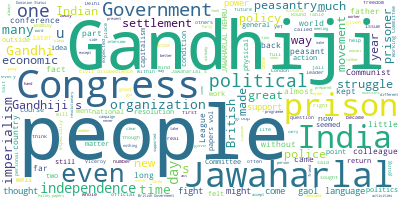

In [17]:
# Import the wordcloud library
from wordcloud import WordCloud

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(" ".join(sent_tok))

# Visualize the word cloud
wordcloud.to_image()

In [18]:
import gensim
from gensim.utils import simple_preprocess
import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
data = sent_tok
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

['however', 'real', 'significance', 'travels', 'jawaharlal', 'came', 'contact', 'european', 'political', 'workers', 'movements', 'gave', 'new', 'depth', 'thinking', 'activities']


In [19]:
import gensim.corpora as corpora
from gensim import models
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

tfidf = models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]
# View
print(corpus_tfidf[:1][0][:30])

[(0, 0.24050702516343034), (1, 0.19986962184172266), (2, 0.3060403362457021), (3, 0.32203548224286926), (4, 0.2675012981468318), (5, 0.2289622600479616), (6, 0.232550606931168), (7, 0.10757403580756379), (8, 0.2497952454923434), (9, 0.20414866182004002), (10, 0.1453354377456852), (11, 0.2224135139434257), (12, 0.2936335371317413), (13, 0.27492565414521364), (14, 0.3445793743445723), (15, 0.2449574060451288)]


In [20]:
from pprint import pprint
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus_tfidf,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.003*"papers" + 0.002*"india" + 0.002*"independence" + 0.002*"gandhiji" + '
  '0.002*"congress" + 0.002*"people" + 0.002*"jawaharlal" + 0.002*"hailey" + '
  '0.002*"halifax" + 0.002*"ansari"'),
 (1,
  '0.004*"prison" + 0.003*"gandhiji" + 0.002*"could" + 0.002*"india" + '
  '0.002*"prisoners" + 0.002*"people" + 0.002*"especially" + 0.002*"congress" '
  '+ 0.002*"even" + 0.002*"time"'),
 (2,
  '0.003*"congress" + 0.003*"jawaharlal" + 0.003*"gandhiji" + 0.003*"physical" '
  '+ 0.002*"conception" + 0.002*"would" + 0.002*"democracy" + 0.002*"india" + '
  '0.002*"fight" + 0.002*"many"'),
 (3,
  '0.003*"congress" + 0.003*"people" + 0.002*"would" + 0.002*"government" + '
  '0.002*"jawaharlal" + 0.002*"political" + 0.002*"sapru" + 0.002*"could" + '
  '0.002*"prison" + 0.002*"even"'),
 (4,
  '0.003*"gandhiji" + 0.003*"people" + 0.003*"government" + 0.002*"india" + '
  '0.002*"also" + 0.002*"prisoners" + 0.002*"would" + 0.002*"officials" + '
  '0.002*"something" + 0.002*"doubt"'),
 (5,
 

In [21]:
# !pip install pyLDAvis
import pyLDAvis.gensim_models
import pickle 
import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('./lda_result/%s/ldavis_prepared_%s'%(books[3], num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, './lda_result/%s/ldavis_prepared_'%books[3]+ str(num_topics) +'.html')
LDAvis_prepared

C:\Users\Sayantan\AppData\Roaming\Python\Python37\site-packages\pyLDAvis\_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8      0.031330 -0.038097       1        1  11.914475
3     -0.016458  0.001090       2        1  11.844057
9     -0.038251  0.017289       3        1  10.581901
4      0.024301  0.056830       4        1  10.419348
2     -0.051192 -0.004566       5        1  10.039089
5      0.024299  0.011893       6        1   9.873383
7      0.016129 -0.017082       7        1   9.372018
6     -0.005635 -0.029603       8        1   9.147118
1      0.004837 -0.009285       9        1   8.493768
0      0.010640  0.011533      10        1   8.314842, topic_info=            Term       Freq      Total Category  logprob  loglift
969       hailey  15.000000  15.000000  Default  30.0000  30.0000
1359      papers  20.000000  20.000000  Default  29.0000  29.0000
1376      ansari   6.000000   6.000000  Default  28.0000  28.0000
346        fight  12.000000  12.000000  Default  27.0000  27.0000
1386       sapru   9.000000   9.000000  Default  26.0000  26.0000
...          ...        ...        ...      ...      ...      ...
1360         vol   1.786203  13.675648  Topic10  -6.5186   0.4516
181        would   2.051956  26.585797  Topic10  -6.3799  -0.0745
594   government   1.916951  22.629350  Topic10  -6.4480   0.0186
711     struggle   1.688632  12.771094  Topic10  -6.5748   0.4639
633       action   1.646868  10.191304  Topic10  -6.5998   0.6645

[666 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
1551      1  0.526313    abolition
1551      2  0.263156    abolition
3928     10  0.352951       absent
3868      6  0.357023  accordingly
2874      6  0.563827  acquisition
...     ...       ...          ...
550       6  0.343133        youth
550       8  0.171566        youth
1828      1  0.210281    zamindars
1828      2  0.210281    zamindars
1828      5  0.420562    zamindars

[1552 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 4, 10, 5, 3, 6, 8, 7, 2, 1])